In [1]:
import numpy as np
from decimal import Decimal
import math
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from matplotlib.widgets import Slider, Button, RadioButtons
import random
import timeit
import scipy.fftpack
import scipy.io as sio
from scipy import stats
from mpl_toolkits.mplot3d import Axes3D
from scipy import signal
from scipy import interpolate
from PIL import Image

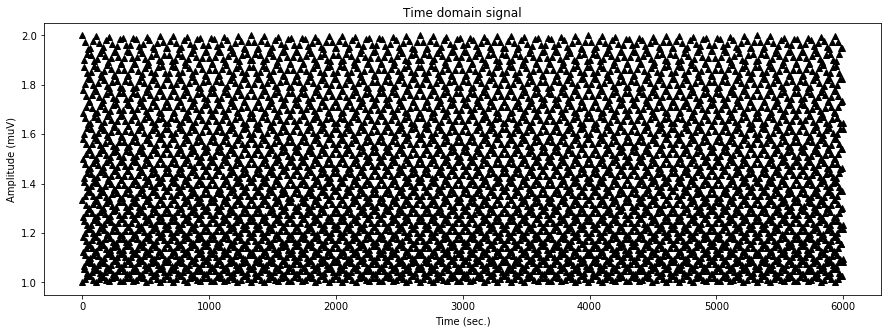

TypeError: stem() got an unexpected keyword argument 'color'

<Figure size 1080x360 with 0 Axes>

In [9]:
z = 6000
#phi = (1+math.sqrt(5))/2
q = 2
p = 3
xcor = []
ycor =[]
x = 0
i = 0

def pycode(x):
    n = math.floor(Decimal(x*(math.log(p,math.e)/math.log(q,math.e))))#a1
    return n

while x <= z:
    ycor.append(Decimal(q**(pycode(x)+1)/p**x))
    ycor.append(Decimal(p**x/q**pycode(x)))
    x += 1
    
rng = z
srate=rng+1
x_ = np.linspace(0,rng,srate)

y = []
f = []
for i in x_:
    y.append(ycor[int(i)])
# extract data from mat file
eegdata = np.array(y)



n = len(x_)
timevec = np.arange(n)/srate

# compute amplitude spectrum
dataX    = scipy.fftpack.fft(eegdata)/n
ampspect = 2*abs(dataX)
hz       = np.linspace(0,srate/2,int(np.floor(n/2)+1))

#freq spectum
plt.figure(figsize=(15,5))
plt.plot(x_,eegdata,'k^')
plt.xlabel('Time (sec.)')
plt.ylabel('Amplitude (muV)')
plt.title('Time domain signal')
plt.show()

# show amplitude spectrum
plt.figure(figsize=(15,5))
plt.stem(hz,ampspect[0:int(np.floor(n/2)+1)],color='g')
plt.xlim([0,srate/2])
plt.ylim([0,.5])
plt.title('Frequency domain')
plt.show()

In [ ]:
print(len(ampspect[0:int(np.floor(n/2)+1)]))

In [ ]:
print(ampspect[0:int(np.floor(n/2)+1)])

In [78]:
reconSig = scipy.fftpack.ifft(dataX)
time  = np.arange(0,z,.9999)
print(type(np.real(reconSig)))
print(type(time))
print(len(np.real(reconSig)))
print(len(time))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
1001
1001


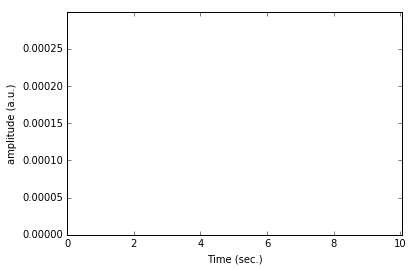

In [153]:
reconSig = scipy.fftpack.ifft(dataX)
time  = np.arange(0,z,.99999999999)

#plt.plot(time,signal,label='Original')
plt.plot(time,np.real(reconSig),label='Reconstructed')
plt.xlabel('Time (sec.)')
plt.ylabel('amplitude (a.u.)')
plt.xlim([0,srate/20])
plt.ylim([0,.0003])
plt.show()

In [209]:
o=0
corr = []
freqlist =[]
amplist =[]
for i in hz:
    freqlist.append((i*(srate/len(ampspect[0:int(np.floor(n/2)+1)]))))
for i in ampspect[0:int(np.floor(n/2)+1)]:
    amplist.append(i)
for j in range(len(hz)):
    print(freqlist[j]/2,amplist[j])

0.0 2.88537013168
1.00000000062 1.98955325459e-05
2.00000000125 2.00056915181e-05
3.00000000187 1.99942694324e-05
4.0000000025 1.99405284286e-05
5.00000000312 1.9916309332e-05
6.00000000375 1.99523268642e-05
7.00000000437 1.99989095185e-05
8.000000005 1.99917567885e-05
9.00000000562 1.99404536335e-05
10.0000000062 1.99181818469e-05
11.0000000069 1.99607853577e-05
12.0000000075 2.00123423101e-05
13.0000000081 1.9999665407e-05
14.0000000087 1.99373164736e-05
15.0000000094 1.99156138769e-05
16.00000001 1.99761184413e-05
17.0000000106 2.00431378907e-05
18.0000000112 2.00207872345e-05
19.0000000119 1.99333478277e-05
20.0000000125 1.99113480374e-05
21.0000000131 2.00146688979e-05
22.0000000137 2.0124355274e-05
23.0000000144 2.00835413677e-05
24.000000015 1.99298327847e-05
25.0000000156 1.99080673545e-05
26.0000000162 2.01722578989e-05
27.0000000169 2.05090665095e-05
28.0000000175 2.04951718268e-05
29.0000000181 1.99700161087e-05
30.0000000187 2.04274168018e-05
31.0000000194 1.82599515508e-05

452.000000282 6.73333642403e-05
453.000000283 4.49408226978e-05
454.000000284 2.99700778701e-05
455.000000284 2.23443569036e-05
456.000000285 2.40758163915e-05
457.000000286 2.68872054688e-05
458.000000286 2.59487995873e-05
459.000000287 2.24626194923e-05
460.000000287 2.06689618957e-05
461.000000288 2.23886885482e-05
462.000000289 2.42676945783e-05
463.000000289 2.36254482998e-05
464.00000029 2.12415631849e-05
465.000000291 2.0279436785e-05
466.000000291 2.19938392127e-05
467.000000292 2.36451388454e-05
468.000000292 2.29353887904e-05
469.000000293 2.06200334028e-05
470.000000294 1.98967459736e-05
471.000000294 2.20078137994e-05
472.000000295 2.38954454704e-05
473.000000296 2.29170419414e-05
474.000000296 1.98241429588e-05
475.000000297 1.89824794357e-05
476.000000297 2.26069465908e-05
477.000000298 2.60638079168e-05
478.000000299 2.47592712787e-05
479.000000299 1.72348466732e-05
480.0000003 1.03617873106e-05
481.000000301 6.44431191651e-05
482.000000301 1.357995609e-05
483.000000302 

952.000000595 2.01666792348e-05
953.000000596 2.53947005279e-05
954.000000596 2.97117528641e-05
955.000000597 2.8246117926e-05
956.000000597 2.22738432716e-05
957.000000598 2.19652773653e-05
958.000000599 3.25052079632e-05
959.000000599 4.24816963322e-05
960.0000006 4.30800405804e-05
961.000000601 2.90875280671e-05
962.000000601 7.59089562609e-05
963.000000602 9.81203255974e-05
964.000000602 2.62417033707e-05
965.000000603 1.12494830725e-05
966.000000604 1.9954522857e-05
967.000000604 2.07316964032e-05
968.000000605 1.42579346921e-05
969.000000606 1.00048106023e-05
970.000000606 1.6466139766e-05
971.000000607 2.19233096484e-05
972.000000607 2.16415065371e-05
973.000000608 1.71355978786e-05
974.000000609 1.51199740825e-05
975.000000609 1.95179289345e-05
976.00000061 2.35894107697e-05
977.000000611 2.30529245319e-05
978.000000611 1.89963967907e-05
979.000000612 1.75480741642e-05
980.000000612 2.20208408664e-05
981.000000613 2.61860847736e-05
982.000000614 2.55285189361e-05
983.000000614 

1451.00000091 2.22315774659e-05
1452.00000091 2.39039172169e-05
1453.00000091 1.874451094e-05
1454.00000091 9.61490190838e-06
1455.00000091 4.58577799556e-06
1456.00000091 1.01215221241e-05
1457.00000091 1.27985916727e-05
1458.00000091 1.10079498514e-05
1459.00000091 6.10321432093e-06
1460.00000091 1.59853646855e-06
1461.00000091 5.28164651923e-06
1462.00000091 7.93593155561e-06
1463.00000091 8.57210460851e-06
1464.00000091 8.02856867692e-06
1465.00000092 7.00966895495e-06
1466.00000092 6.10849491597e-06
1467.00000092 7.32533054917e-06
1468.00000092 1.09902232631e-05
1469.00000092 1.43614616727e-05
1470.00000092 1.60187139753e-05
1471.00000092 2.02988080045e-05
1472.00000092 3.74163007965e-05
1473.00000092 8.63529492105e-05
1474.00000092 0.00011331774953
1475.00000092 2.93639683119e-05
1476.00000092 4.55190694268e-05
1477.00000092 4.4850244407e-05
1478.00000092 3.31451429351e-05
1479.00000092 1.93869464756e-05
1480.00000092 2.25425038484e-05
1481.00000093 3.45741430398e-05
1482.0000009

1951.00000122 2.26210583439e-05
1952.00000122 2.86053901234e-05
1953.00000122 4.10669060822e-05
1954.00000122 7.43251345254e-05
1955.00000122 0.000813243481663
1956.00000122 6.1351002379e-05
1957.00000122 5.10118421213e-05
1958.00000122 3.91126324571e-05
1959.00000122 2.11156236596e-05
1960.00000122 1.80780417573e-06
1961.00000123 1.51054663829e-05
1962.00000123 2.34073633732e-05
1963.00000123 2.21348424275e-05
1964.00000123 1.29322521011e-05
1965.00000123 4.6551575785e-06
1966.00000123 1.47292671902e-05
1967.00000123 2.13288623104e-05
1968.00000123 2.01030988507e-05
1969.00000123 1.21177767091e-05
1970.00000123 7.55795241031e-06
1971.00000123 1.68566833849e-05
1972.00000123 2.31603686829e-05
1973.00000123 2.16521799324e-05
1974.00000123 1.30834375228e-05
1975.00000123 9.53893374239e-06
1976.00000123 2.1029105006e-05
1977.00000124 2.92451892226e-05
1978.00000124 2.80800380562e-05
1979.00000124 1.67470802739e-05
1980.00000124 1.11440422457e-05
1981.00000124 3.38321835002e-05
1982.000001

2451.00000153 2.42514165381e-05
2452.00000153 2.97392443095e-05
2453.00000153 4.14328770017e-05
2454.00000153 4.44602192169e-05
2455.00000153 3.61190083684e-05
2456.00000153 2.62751730907e-05
2457.00000154 3.49954169228e-05
2458.00000154 5.01023498922e-05
2459.00000154 5.41794411303e-05
2460.00000154 4.26679551942e-05
2461.00000154 2.97581012697e-05
2462.00000154 5.3104538054e-05
2463.00000154 8.9206557035e-05
2464.00000154 0.000111927482916
2465.00000154 0.000102599743039
2466.00000154 0.000249617181406
2467.00000154 0.000203206077211
2468.00000154 0.000101439352771
2469.00000154 3.97091308401e-05
2470.00000154 8.78285332641e-06
2471.00000154 2.92584022397e-05
2472.00000154 3.19732345057e-05
2473.00000155 1.9080272513e-05
2474.00000155 4.28333344908e-06
2475.00000155 2.09468369105e-05
2476.00000155 3.03294943729e-05
2477.00000155 2.76741143159e-05
2478.00000155 1.61856446892e-05
2479.00000155 1.38693002612e-05
2480.00000155 2.64853173811e-05
2481.00000155 3.31353493074e-05
2482.000001

2951.00000184 0.000106529353625
2952.00000184 7.78678215995e-05
2953.00000185 4.13230204481e-05
2954.00000185 1.65362180409e-05
2955.00000185 2.70596523924e-05
2956.00000185 3.50039351657e-05
2957.00000185 3.10294133212e-05
2958.00000185 1.88226624824e-05
2959.00000185 4.20112429993e-06
2960.00000185 8.26168193874e-06
2961.00000185 1.54514086972e-05
2962.00000185 1.77881371707e-05
2963.00000185 1.688053979e-05
2964.00000185 1.36390579794e-05
2965.00000185 7.85242749597e-06
2966.00000185 5.7157806863e-06
2967.00000185 1.53555431626e-05
2968.00000185 2.39373130566e-05
2969.00000186 2.59550260435e-05
2970.00000186 1.83899102177e-05
2971.00000186 2.42286793238e-06
2972.00000186 2.15879038829e-05
2973.00000186 4.27519000853e-05
2974.00000186 5.41420457346e-05
2975.00000186 4.91249703286e-05
2976.00000186 4.23661958063e-05
2977.00000186 0.000191789217998
2978.00000186 0.000228655178741
2979.00000186 5.56738196275e-05
2980.00000186 5.51154066788e-05
2981.00000186 6.47350084072e-05
2982.000001

3374.00000211 0.000659701236564
3375.00000211 0.000700338182923
3376.00000211 0.000714461281638
3377.00000211 0.000725939188833
3378.00000211 0.000761670559398
3379.00000211 0.000817472567085
3380.00000211 0.00086852872371
3381.00000211 0.00090480243619
3382.00000211 0.000942967653812
3383.00000211 0.00100462012372
3384.00000211 0.00108797727213
3385.00000212 0.00117304869955
3386.00000212 0.00125199925347
3387.00000212 0.0013433822391
3388.00000212 0.0014727269192
3389.00000212 0.00164306807643
3390.00000212 0.00183860232367
3391.00000212 0.00206014746126
3392.00000212 0.0023496379557
3393.00000212 0.00277656449169
3394.00000212 0.00341213605648
3395.00000212 0.00436886560385
3396.00000212 0.00600163992315
3397.00000212 0.00971078547812
3398.00000212 0.0264759653979
3399.00000212 0.0371411646449
3400.00000212 0.0109511026293
3401.00000213 0.0063565113124
3402.00000213 0.00446029603408
3403.00000213 0.00346402689655
3404.00000213 0.00284868089435
3405.00000213 0.00240234360641
3406.000

3700.00000231 0.000294495762513
3701.00000231 0.000107007315123
3702.00000231 2.14588276108e-05
3703.00000231 5.00236244389e-05
3704.00000231 6.87434429226e-05
3705.00000232 5.65765464646e-05
3706.00000232 2.90531755938e-05
3707.00000232 3.40996975746e-05
3708.00000232 5.92971312775e-05
3709.00000232 6.79343163345e-05
3710.00000232 5.692295932e-05
3711.00000232 4.16325235193e-05
3712.00000232 5.09485810685e-05
3713.00000232 7.07059682275e-05
3714.00000232 7.70197609591e-05
3715.00000232 6.65546735431e-05
3716.00000232 5.59315184123e-05
3717.00000232 6.93253487381e-05
3718.00000232 9.13421954764e-05
3719.00000232 9.89616293118e-05
3720.00000232 8.8517515578e-05
3721.00000233 8.14260475916e-05
3722.00000233 0.000106656218499
3723.00000233 0.000144814675357
3724.00000233 0.000165766430146
3725.00000233 0.000162350475783
3726.00000233 0.00017575461457
3727.00000233 0.000292847662832
3728.00000233 0.000583012266507
3729.00000233 0.00188443894982
3730.00000233 0.00105066797106
3731.00000233 

4200.00000262 7.60893112781e-05
4201.00000263 8.54118708621e-05
4202.00000263 7.13828979659e-05
4203.00000263 4.19059355174e-05
4204.00000263 4.37464312132e-05
4205.00000263 7.44523842422e-05
4206.00000263 8.44982734799e-05
4207.00000263 5.70035169906e-05
4208.00000263 1.69737391867e-05
4209.00000263 0.000125301381867
4210.00000263 0.000347864287436
4211.00000263 0.000223977639417
4212.00000263 0.00010898388464
4213.00000263 0.000141325303194
4214.00000263 0.000113841276938
4215.00000263 6.08471247932e-05
4216.00000263 3.3366992771e-05
4217.00000264 6.44339336089e-05
4218.00000264 8.03025606929e-05
4219.00000264 6.92534416321e-05
4220.00000264 4.3132579036e-05
4221.00000264 3.83565239531e-05
4222.00000264 5.92632211705e-05
4223.00000264 6.84261354285e-05
4224.00000264 5.73036742135e-05
4225.00000264 3.69275513678e-05
4226.00000264 4.02393542532e-05
4227.00000264 5.97995150267e-05
4228.00000264 6.56329592627e-05
4229.00000264 5.15073238033e-05
4230.00000264 3.20209167824e-05
4231.000002

4567.00000285 0.000228798189247
4568.00000285 0.000307094669884
4569.00000286 0.000365342600172
4570.00000286 0.000485613894241
4571.00000286 0.00152405977218
4572.00000286 0.00223281802341
4573.00000286 0.000721707415342
4574.00000286 0.000358961494372
4575.00000286 0.000207590168542
4576.00000286 0.0001863432271
4577.00000286 0.00018782609411
4578.00000286 0.000160036719364
4579.00000286 0.000111915261534
4580.00000286 8.06238661378e-05
4581.00000286 9.01012060414e-05
4582.00000286 0.00010122886747
4583.00000286 8.99083061601e-05
4584.00000286 6.21485323901e-05
4585.00000287 4.76145750659e-05
4586.00000287 6.2933163277e-05
4587.00000287 7.33467849673e-05
4588.00000287 6.30541164811e-05
4589.00000287 3.82717148389e-05
4590.00000287 3.27710611999e-05
4591.00000287 5.41934415873e-05
4592.00000287 6.30831977293e-05
4593.00000287 4.86461181297e-05
4594.00000287 1.73849788866e-05
4595.00000287 3.24545195306e-05
4596.00000287 6.29165017934e-05
4597.00000287 6.79645984275e-05
4598.00000287 3

5191.00000324 7.56360002444e-05
5192.00000324 5.85540985387e-05
5193.00000325 7.71714434177e-05
5194.00000325 0.000102458937587
5195.00000325 0.000105433938706
5196.00000325 8.1019284356e-05
5197.00000325 5.36293734796e-05
5198.00000325 8.29037152169e-05
5199.00000325 0.000133562519826
5200.00000325 0.000164945061004
5201.00000325 0.00016319303062
5202.00000325 0.000118261088884
5203.00000325 0.000446898931539
5204.00000325 0.000257547885519
5205.00000325 0.000198813587099
5206.00000325 0.000164668814184
5207.00000325 0.000118289912784
5208.00000325 6.41788953895e-05
5209.00000326 4.94078939848e-05
5210.00000326 8.43617308888e-05
5211.00000326 0.000104781804765
5212.00000326 9.69364541428e-05
5213.00000326 6.99975723563e-05
5214.00000326 5.70646834326e-05
5215.00000326 7.84368562345e-05
5216.00000326 9.72397417956e-05
5217.00000326 9.38395000186e-05
5218.00000326 7.20202313439e-05
5219.00000326 5.89206794919e-05
5220.00000326 7.7433657095e-05
5221.00000326 9.73824498461e-05
5222.000003

5949.00000372 2.68962360234e-05
5950.00000372 3.14430122194e-05
5951.00000372 6.25583523849e-05
5952.00000372 0.000105204795063
5953.00000372 0.000150100292735
5954.00000372 0.000190744421288
5955.00000372 0.00196370989862
5956.00000372 0.00023917143107
5957.00000372 0.000194202475
5958.00000372 0.000137840873315
5959.00000372 7.02714980916e-05
5960.00000372 7.52532751493e-06
5961.00000373 4.8612067848e-05
5962.00000373 7.45954792216e-05
5963.00000373 7.19672212201e-05
5964.00000373 4.58273441565e-05
5965.00000373 1.66231570785e-05
5966.00000373 4.00723859253e-05
5967.00000373 6.26287730531e-05
5968.00000373 6.36641232422e-05
5969.00000373 4.3624769905e-05
5970.00000373 2.18292930184e-05
5971.00000373 4.33614553994e-05
5972.00000373 6.66286484903e-05
5973.00000373 6.90529563564e-05
5974.00000373 4.85750515688e-05
5975.00000373 2.66414105942e-05
5976.00000373 5.46498800786e-05
5977.00000374 8.57044742239e-05
5978.00000374 9.14980485863e-05
5979.00000374 6.46652226501e-05
5980.00000374 3

6449.00000403 0.000148091449994
6450.00000403 0.000121682216047
6451.00000403 0.000128466005173
6452.00000403 0.000159372157165
6453.00000403 0.000174531989113
6454.00000403 0.000160382790244
6455.00000403 0.000137020352826
6456.00000403 0.00014814737136
6457.00000404 0.000190209696935
6458.00000404 0.000218751665594
6459.00000404 0.000212146797391
6460.00000404 0.000190033071032
6461.00000404 0.000220273403511
6462.00000404 0.00032184790837
6463.00000404 0.000438706047538
6464.00000404 0.000537059166381
6465.00000404 0.000701432536323
6466.00000404 0.00270417125719
6467.00000404 0.0016438574782
6468.00000404 0.000722153271545
6469.00000404 0.000392755953449
6470.00000404 0.000201912403214
6471.00000404 0.000140647215503
6472.00000404 0.000158108802267
6473.00000405 0.00015807240689
6474.00000405 0.000124382375135
6475.00000405 7.45574858734e-05
6476.00000405 4.97564132707e-05
6477.00000405 7.08758392878e-05
6478.00000405 8.55298386827e-05
6479.00000405 7.64917204833e-05
6480.00000405 

6948.00000434 0.000375783646336
6949.00000434 0.000119747182458
6950.00000434 0.000167664277666
6951.00000434 0.000127187545695
6952.00000434 5.23673507607e-05
6953.00000435 2.18423200064e-05
6954.00000435 7.04421141414e-05
6955.00000435 8.17388922229e-05
6956.00000435 5.82014725748e-05
6957.00000435 1.76343886846e-05
6958.00000435 3.83373607739e-05
6959.00000435 6.72396677833e-05
6960.00000435 6.95313437317e-05
6961.00000435 4.57304966321e-05
6962.00000435 1.98394305293e-05
6963.00000435 4.7668137903e-05
6964.00000435 7.13759762739e-05
6965.00000435 6.92342564104e-05
6966.00000435 4.17788224878e-05
6967.00000435 2.36171652344e-05
6968.00000435 6.05231183137e-05
6969.00000436 8.57025725803e-05
6970.00000436 7.93750900839e-05
6971.00000436 3.98251288599e-05
6972.00000436 3.32643986794e-05
6973.00000436 9.99449991961e-05
6974.00000436 0.000146105450313
6975.00000436 0.000141843258642
6976.00000436 5.69448901325e-05
6977.00000436 0.000357458285778
6978.00000436 0.000969213745761
6979.0000

7344.00000459 3.95593674604e-06
7345.00000459 5.76142299851e-05
7346.00000459 7.7777635691e-05
7347.00000459 6.25993676996e-05
7348.00000459 2.35603281965e-05
7349.00000459 2.26345720495e-05
7350.00000459 5.51233618644e-05
7351.00000459 6.33013737843e-05
7352.00000459 4.50731936878e-05
7353.0000046 1.12362764819e-05
7354.0000046 3.36353591436e-05
7355.0000046 6.00680938658e-05
7356.0000046 6.25930060397e-05
7357.0000046 3.91949807622e-05
7358.0000046 9.28799170937e-06
7359.0000046 4.79888106719e-05
7360.0000046 7.54319075656e-05
7361.0000046 7.35356818891e-05
7362.0000046 3.82492463303e-05
7363.0000046 2.25279148547e-05
7364.0000046 8.96360279439e-05
7365.0000046 0.000138038070041
7366.0000046 0.00014031033414
7367.0000046 7.38010344015e-05
7368.0000046 0.000371387392636
7369.00000461 0.000958445562407
7370.00000461 0.000252684690291
7371.00000461 8.12929373216e-05
7372.00000461 6.36880004094e-05
7373.00000461 8.56609121784e-05
7374.00000461 7.17407992433e-05
7375.00000461 3.2545223587

7698.00000481 0.000171725009912
7699.00000481 0.000673740293621
7700.00000481 0.0010813401408
7701.00000481 0.000429023097519
7702.00000481 0.000175975208848
7703.00000481 3.53251907066e-05
7704.00000481 9.5499430237e-05
7705.00000482 0.000122695967685
7706.00000482 9.76407174518e-05
7707.00000482 4.26522846043e-05
7708.00000482 2.66180168281e-05
7709.00000482 6.62641242624e-05
7710.00000482 7.66329167356e-05
7711.00000482 5.52207929106e-05
7712.00000482 1.63508253946e-05
7713.00000482 3.54363839502e-05
7714.00000482 6.34108122306e-05
7715.00000482 6.48779364066e-05
7716.00000482 3.91962794849e-05
7717.00000482 1.16368124014e-05
7718.00000482 4.93517741223e-05
7719.00000482 7.29411510127e-05
7720.00000482 6.62922128065e-05
7721.00000483 2.92430447627e-05
7722.00000483 3.02445626815e-05
7723.00000483 8.39069346778e-05
7724.00000483 0.000111115235445
7725.00000483 9.05560508631e-05
7726.00000483 1.20032968046e-05
7727.00000483 0.000132457287416
7728.00000483 0.000354807930718
7729.000004

8198.00000512 0.000105151487123
8199.00000512 8.80401121909e-05
8200.00000512 4.85391229174e-05
8201.00000513 5.29262793774e-05
8202.00000513 9.63435615061e-05
8203.00000513 0.000115044364313
8204.00000513 9.29289668968e-05
8205.00000513 3.54233951104e-05
8206.00000513 5.49423073582e-05
8207.00000513 0.000131927184029
8208.00000513 0.000186630062748
8209.00000513 0.000222256264927
8210.00000513 0.000372787035883
8211.00000513 0.000795703505852
8212.00000513 0.000101407466536
8213.00000513 0.000130289119632
8214.00000513 0.000171944869504
8215.00000513 0.000160457006214
8216.00000513 0.000105180471681
8217.00000514 4.72379484707e-05
8218.00000514 8.27621168112e-05
8219.00000514 0.000127003360516
8220.00000514 0.000132050130448
8221.00000514 0.000100421130426
8222.00000514 7.03453355645e-05
8223.00000514 9.71546030212e-05
8224.00000514 0.000133139768273
8225.00000514 0.000137388674763
8226.00000514 0.000109498132902
8227.00000514 8.90636961491e-05
8228.00000514 0.000120829797637
8229.000

8697.00000544 0.000152537743857
8698.00000544 0.000105780768484
8699.00000544 4.31315970103e-05
8700.00000544 1.25115493238e-05
8701.00000544 4.75952831862e-05
8702.00000544 5.91154142789e-05
8703.00000544 5.25158314959e-05
8704.00000544 3.71850355055e-05
8705.00000544 2.22324566959e-05
8706.00000544 1.90799967639e-05
8707.00000544 3.14157959738e-05
8708.00000544 4.51543975937e-05
8709.00000544 5.04974829542e-05
8710.00000544 4.14060914701e-05
8711.00000544 1.79580235379e-05
8712.00000544 2.2562836052e-05
8713.00000545 5.65948702486e-05
8714.00000545 7.8315522374e-05
8715.00000545 7.53504600641e-05
8716.00000545 4.15794932662e-05
8717.00000545 2.26632868672e-05
8718.00000545 0.000105857990879
8719.00000545 0.000194854233178
8720.00000545 0.000271648528701
8721.00000545 0.000316183511896
8722.00000545 0.000623223962144
8723.00000545 0.000358537690359
8724.00000545 0.000291696043227
8725.00000545 0.000206177402121
8726.00000545 0.000110539380797
8727.00000545 2.09389873949e-05
8728.00000

9197.00000575 0.000106013014811
9198.00000575 6.43746794565e-05
9199.00000575 0.000157929379641
9200.00000575 0.000283641669435
9201.00000575 0.000368813759345
9202.00000575 0.000360841548341
9203.00000575 0.00121682047637
9204.00000575 0.000873712435235
9205.00000575 0.000470234616245
9206.00000575 0.000236988148091
9207.00000575 6.48432596651e-05
9208.00000575 7.83104717338e-05
9209.00000576 0.000127377192621
9210.00000576 0.000117607867132
9211.00000576 6.60227999489e-05
9212.00000576 1.37014296879e-05
9213.00000576 5.9119010212e-05
9214.00000576 8.26357065864e-05
9215.00000576 7.03335388077e-05
9216.00000576 3.08243417797e-05
9217.00000576 2.20913213158e-05
9218.00000576 6.02734999075e-05
9219.00000576 7.3327847198e-05
9220.00000576 5.56194951943e-05
9221.00000576 1.48432457756e-05
9222.00000576 3.48358550949e-05
9223.00000576 7.05705964257e-05
9224.00000576 7.83877316473e-05
9225.00000577 5.28736613438e-05
9226.00000577 6.18481363709e-06
9227.00000577 5.95193227025e-05
9228.000005

9697.00000606 8.30748596782e-05
9698.00000606 7.27728962911e-05
9699.00000606 3.3636323809e-05
9700.00000606 2.61220745376e-05
9701.00000606 6.81892789436e-05
9702.00000606 8.47190681871e-05
9703.00000606 6.63643750605e-05
9704.00000606 2.11991810591e-05
9705.00000607 4.41713227008e-05
9706.00000607 9.01986079535e-05
9707.00000607 0.000103180337073
9708.00000607 7.18963866228e-05
9709.00000607 1.18228447223e-06
9710.00000607 8.85331596634e-05
9711.00000607 0.000166004389318
9712.00000607 0.000196599868956
9713.00000607 0.000158877125952
9714.00000607 0.000479836599955
9715.00000607 0.000884857950953
9716.00000607 0.000253634964938
9717.00000607 7.69787931646e-05
9718.00000607 0.000107663741558
9719.00000607 0.000137543897747
9720.00000607 0.000109933532264
9721.00000608 4.37699567773e-05
9722.00000608 4.41439938368e-05
9723.00000608 0.000101784114693
9724.00000608 0.000121054273605
9725.00000608 9.70807661274e-05
9726.00000608 5.59794249942e-05
9727.00000608 7.63210030803e-05
9728.0000

10103.0000063 4.36802091891e-05
10104.0000063 0.000158848441446
10105.0000063 0.000700702538111
10106.0000063 0.00077397767447
10107.0000063 0.000358119860579
10108.0000063 0.000278440432566
10109.0000063 0.000178575568762
10110.0000063 7.60626151746e-05
10111.0000063 0.000105704988339
10112.0000063 0.00017390615637
10113.0000063 0.000191409189396
10114.0000063 0.00015691433762
10115.0000063 0.000107012947394
10116.0000063 0.000115709922682
10117.0000063 0.000161862611763
10118.0000063 0.000180427343899
10119.0000063 0.000157252046209
10120.0000063 0.000116813681026
10121.0000063 0.000118742878807
10122.0000063 0.000160708624136
10123.0000063 0.000184707270708
10124.0000063 0.000168946781182
10125.0000063 0.000127696940099
10126.0000063 0.000118818685244
10127.0000063 0.000169402346348
10128.0000063 0.000220205120384
10129.0000063 0.00023500750565
10130.0000063 0.000208590820934
10131.0000063 0.000185405451285
10132.0000063 0.000290914708344
10133.0000063 0.000563620038233
10134.000006

10446.0000065 6.162729106e-05
10447.0000065 3.46248870322e-05
10448.0000065 1.06600250488e-05
10449.0000065 5.36471943414e-05
10450.0000065 8.02713016881e-05
10451.0000065 7.77826585637e-05
10452.0000065 4.60569174036e-05
10453.0000065 2.52415961734e-05
10454.0000065 7.3244852324e-05
10455.0000065 0.000108528341159
10456.0000065 0.000108836183062
10457.0000065 7.25158076617e-05
10458.0000065 5.09692120336e-05
10459.0000065 0.000116331817875
10460.0000065 0.000178751531267
10461.0000065 0.00019480428566
10462.0000065 0.000148395947573
10463.0000065 0.000119541040662
10464.0000065 0.00032250506405
10465.0000065 0.000735173150291
10466.0000065 0.00228497503724
10467.0000065 0.00105712063596
10468.0000065 0.000202302892492
10469.0000065 0.000261687655464
10470.0000065 0.000265310469917
10471.0000065 0.00019825743842
10472.0000065 0.000101246283074
10473.0000065 2.62229415344e-05
10474.0000065 7.13971251817e-05
10475.0000065 9.95025001396e-05
10476.0000065 9.11613185391e-05
10477.0000065 5.

10859.0000068 0.000290190772467
10860.0000068 0.000315212679589
10861.0000068 0.000315608995609
10862.0000068 0.00024066542988
10863.0000068 0.00013172518085
10864.0000068 5.67943013487e-05
10865.0000068 9.69033036073e-05
10866.0000068 0.000127377756004
10867.0000068 0.000114653281831
10868.0000068 6.87548208066e-05
10869.0000068 1.8444784755e-05
10870.0000068 5.00518615381e-05
10871.0000068 7.77718628748e-05
10872.0000068 7.64140252695e-05
10873.0000068 4.97019417168e-05
10874.0000068 1.16761141965e-05
10875.0000068 3.12141058907e-05
10876.0000068 5.59837509551e-05
10877.0000068 6.23319804725e-05
10878.0000068 5.3723724912e-05
10879.0000068 4.19016255054e-05
10880.0000068 4.06674537398e-05
10881.0000068 5.20792037973e-05
10882.0000068 7.37660703431e-05
10883.0000068 0.000103386657738
10884.0000068 0.000130676666757
10885.0000068 0.000143976139942
10886.0000068 0.000172725965511
10887.0000068 0.00064175058646
10888.0000068 0.00081690478493
10889.0000068 0.000286527043444
10890.0000068 

11196.000007 7.82591594432e-05
11197.000007 4.35542810226e-05
11198.000007 9.66458970711e-05
11199.000007 0.000133294852252
11200.000007 0.0001273996113
11201.000007 8.62320744345e-05
11202.000007 5.95172889516e-05
11203.000007 9.99207986725e-05
11204.000007 0.000135635393456
11205.000007 0.000132908713251
11206.000007 9.36517285689e-05
11207.000007 6.39316425565e-05
11208.000007 0.000106900127156
11209.000007 0.000151574326429
11210.000007 0.000155098493478
11211.000007 0.000110805019374
11212.000007 5.97351726048e-05
11213.000007 0.000125752213696
11214.000007 0.000216805804794
11215.000007 0.000268638711806
11216.000007 0.000251093684307
11217.000007 0.000117294549185
11218.000007 0.000743190245576
11219.000007 0.000763562623205
11220.000007 0.00038708509592
11221.000007 0.000244413685409
11222.000007 0.000141019577221
11223.000007 4.6897536752e-05
11224.000007 3.80013510257e-05
11225.000007 0.000100083657445
11226.000007 0.000126898570512
11227.000007 0.000113547940414
11228.000007

11587.0000072 0.000716422213378
11588.0000072 0.000720837197682
11589.0000072 0.000783026220616
11590.0000072 0.000822426908951
11591.0000072 0.00080218691506
11592.0000072 0.000762303871017
11593.0000072 0.000769526008831
11594.0000072 0.000822708688111
11595.0000072 0.000856874024287
11596.0000072 0.000836929829211
11597.0000072 0.000798849671769
11598.0000072 0.000809175249433
11599.0000072 0.000868159949011
11600.0000072 0.000905352256322
11601.0000073 0.000877593313514
11602.0000073 0.000824961465069
11603.0000073 0.000838897068775
11604.0000073 0.000929181236442
11605.0000073 0.000991683321629
11606.0000073 0.000937378017821
11607.0000073 0.000783446213429
11608.0000073 0.000745618412989
11609.0000073 0.001606170081
11610.0000073 0.000813636925078
11611.0000073 0.00107114264365
11612.0000073 0.00112834947017
11613.0000073 0.00104100575685
11614.0000073 0.000940132369577
11615.0000073 0.000947320587402
11616.0000073 0.00103257800642
11617.0000073 0.00108388333219
11618.0000073 0.0

11945.0000075 0.000348841868449
11946.0000075 0.00041995397037
11947.0000075 0.000408396732036
11948.0000075 0.00033586232669
11949.0000075 0.000291255422458
11950.0000075 0.000327817910027
11951.0000075 0.000371247425017
11952.0000075 0.00036089073013
11953.0000075 0.000308582272704
11954.0000075 0.000282054356628
11955.0000075 0.000317646036873
11956.0000075 0.000354231256612
11957.0000075 0.000340580546319
11958.0000075 0.000288671633653
11959.0000075 0.000268211371668
11960.0000075 0.000313100550499
11961.0000075 0.00035278438163
11962.0000075 0.000331090948696
11963.0000075 0.00026128125779
11964.0000075 0.000243430411196
11965.0000075 0.000326120919796
11966.0000075 0.000389570176112
11967.0000075 0.000341344844017
11968.0000075 0.000150139703665
11969.0000075 0.000353156855978
11970.0000075 0.00276878698836
11971.0000075 0.0003572889001
11972.0000075 0.000253992231566
11973.0000075 0.00041905652493
11974.0000075 0.000401937308689
11975.0000075 0.000293257839385
11976.0000075 0.0

12445.0000078 0.000110405839578
12446.0000078 8.00326401306e-05
12447.0000078 5.62618869307e-05
12448.0000078 0.000115258917003
12449.0000078 0.000189648924267
12450.0000078 0.000269168057096
12451.0000078 0.000797217307619
12452.0000078 0.000821218041148
12453.0000078 0.000337876348506
12454.0000078 0.000167710228644
12455.0000078 5.75925050897e-05
12456.0000078 7.27390473668e-05
12457.0000078 0.000118648778198
12458.0000078 0.000125857398297
12459.0000078 9.26782570141e-05
12460.0000078 3.30833396312e-05
12461.0000078 5.00275864824e-05
12462.0000078 0.000107648352952
12463.0000078 0.000132718322942
12464.0000078 0.000115846286009
12465.0000078 7.60783413115e-05
12466.0000078 9.20777139916e-05
12467.0000078 0.000154664876211
12468.0000078 0.000192682638043
12469.0000078 0.000184528912804
12470.0000078 0.000155902331766
12471.0000078 0.000188069423892
12472.0000078 0.000277712105428
12473.0000078 0.000346660644693
12474.0000078 0.000358907761628
12475.0000078 0.000354967871938
12476.00

12945.0000081 0.000108940969356
12946.0000081 0.000148102166779
12947.0000081 0.000188574749033
12948.0000081 0.000179710002192
12949.0000081 0.000129213071581
12950.0000081 0.000106544334298
12951.0000081 0.00015667246164
12952.0000081 0.000193926731116
12953.0000081 0.000175234957801
12954.0000081 0.000112936444177
12955.0000081 0.000110648692361
12956.0000081 0.000191683031834
12957.0000081 0.000235291042688
12958.0000081 0.000191973452881
12959.0000081 7.86295456461e-05
12960.0000081 0.00022703501459
12961.0000081 0.000529267946632
12962.0000081 0.00101367410554
12963.0000081 0.000693128213246
12964.0000081 0.000381540351319
12965.0000081 0.000404979122303
12966.0000081 0.000277350799277
12967.0000081 0.00011189379583
12968.0000081 0.000104169876882
12969.0000081 0.000189884912
12970.0000081 0.000204073789943
12971.0000081 0.000151001615102
12972.0000081 8.94578999264e-05
12973.0000081 0.000122436151303
12974.0000081 0.000173193709736
12975.0000081 0.000175099086941
12976.0000081 0

13445.0000084 0.00028830675721
13446.0000084 0.000280398966975
13447.0000084 0.000260073770757
13448.0000084 0.000211615427675
13449.0000084 0.000128880908104
13450.0000084 4.14797146994e-05
13451.0000084 9.12960251366e-05
13452.0000084 0.000151753474771
13453.0000084 0.000161781301505
13454.0000084 0.000121800393967
13455.0000084 6.72632229992e-05
13456.0000084 9.0892163639e-05
13457.0000084 0.000141610016223
13458.0000084 0.00015357234223
13459.0000084 0.000119100141787
13460.0000084 7.09718808643e-05
13461.0000084 9.635858204e-05
13462.0000084 0.000147319915801
13463.0000084 0.000158218157778
13464.0000084 0.000117590850448
13465.0000084 6.23487363433e-05
13466.0000084 0.00010988944181
13467.0000084 0.000175939231469
13468.0000084 0.00018520511761
13469.0000084 0.000116384401826
13470.0000084 4.67663070898e-05
13471.0000084 0.000224815141988
13472.0000084 0.000409616618314
13473.0000084 0.000538439846354
13474.0000084 0.00274334921583
13475.0000084 0.000589496437717
13476.0000084 0.

13885.0000087 1.43706577481e-05
13886.0000087 5.1041427158e-05
13887.0000087 0.000105029148949
13888.0000087 0.000125172827724
13889.0000087 9.36179431093e-05
13890.0000087 6.08932270508e-06
13891.0000087 0.000125008240573
13892.0000087 0.000271683339388
13893.0000087 0.000394427664999
13894.0000087 0.000435913966437
13895.0000087 0.000822592107053
13896.0000087 0.000629119820391
13897.0000087 0.00044183347289
13898.0000087 0.000263372940976
13899.0000087 9.53552200827e-05
13900.0000087 3.62054202269e-05
13901.0000087 0.000109588712453
13902.0000087 0.000122246524207
13903.0000087 8.66323967534e-05
13904.0000087 2.97910828937e-05
13905.0000087 3.80961543635e-05
13906.0000087 6.91390436058e-05
13907.0000087 6.80982915744e-05
13908.0000087 4.09801506113e-05
13909.0000087 2.86629990849e-05
13910.0000087 5.51451513536e-05
13911.0000087 6.43487166454e-05
13912.0000087 4.34872315025e-05
13913.0000087 1.84130850923e-05
13914.0000087 6.22834493588e-05
13915.0000087 9.5739859695e-05
13916.00000

14194.0000089 0.000642591284043
14195.0000089 0.000999816437266
14196.0000089 0.00181011967938
14197.0000089 0.00047431289634
14198.0000089 0.000436951603034
14199.0000089 0.000300394355333
14200.0000089 0.000136435509433
14201.0000089 7.91670710203e-06
14202.0000089 9.55920409971e-05
14203.0000089 0.000122223517214
14204.0000089 9.56201752917e-05
14205.0000089 4.011527581e-05
14206.0000089 2.80618030553e-05
14207.0000089 6.54284385546e-05
14208.0000089 7.40105726182e-05
14209.0000089 5.43263418798e-05
14210.0000089 2.55362418407e-05
14211.0000089 3.72578395303e-05
14212.0000089 5.89714078332e-05
14213.0000089 6.25493211571e-05
14214.0000089 4.93200188009e-05
14215.0000089 3.505107479e-05
14216.0000089 4.32620573594e-05
14217.0000089 6.2951614115e-05
14218.0000089 7.83562659013e-05
14219.0000089 8.28536917077e-05
14220.0000089 7.04463353364e-05
14221.0000089 5.29029500727e-05
14222.0000089 0.000105916533343
14223.0000089 0.000221160887609
14224.0000089 0.00036437579405
14225.0000089 0.

14645.0000092 0.000468640689337
14646.0000092 0.000568229145269
14647.0000092 0.00459156606139
14648.0000092 0.000503648280756
14649.0000092 0.000429295865495
14650.0000092 0.000314058908125
14651.0000092 0.000179893848227
14652.0000092 5.08787217604e-05
14653.0000092 6.74035211343e-05
14654.0000092 0.000133715993968
14655.0000092 0.000150292403103
14656.0000092 0.00011793676453
14657.0000092 5.51466002736e-05
14658.0000092 5.00925239319e-05
14659.0000092 0.000107351665908
14660.0000092 0.000132956926352
14661.0000092 0.000113409250907
14662.0000092 6.1914691535e-05
14663.0000092 6.01036081257e-05
14664.0000092 0.000118043375603
14665.0000092 0.000147516228164
14666.0000092 0.000127370460147
14667.0000092 7.07206261868e-05
14668.0000092 8.16475083284e-05
14669.0000092 0.000158692709861
14670.0000092 0.000199050966929
14671.0000092 0.000169631969731
14672.0000092 8.13179666219e-05
14673.0000092 0.000149020172678
14674.0000092 0.000333089553556
14675.0000092 0.000490824359964
14676.00000

14944.0000093 0.000215910753474
14945.0000093 0.000313334010769
14946.0000093 0.000350854927633
14947.0000093 0.00051512957053
14948.0000093 0.00154899541177
14949.0000093 0.00024307828356
14950.0000093 0.000106921465732
14951.0000093 0.00021057904142
14952.0000093 0.000243604563987
14953.0000093 0.000193918257568
14954.0000093 9.86006973623e-05
14955.0000093 8.67899234418e-05
14956.0000093 0.000163765312472
14957.0000093 0.00019613285446
14958.0000093 0.000166839110369
14959.0000093 0.000106184180309
14960.0000093 0.000108202647021
14961.0000094 0.000166452000368
14962.0000094 0.000191370970596
14963.0000094 0.000162005787881
14964.0000094 0.000108996632108
14965.0000094 0.000124006427268
14966.0000094 0.000184391023111
14967.0000094 0.000205925752986
14968.0000094 0.000167113536498
14969.0000094 0.000110190184203
14970.0000094 0.000157494028683
14971.0000094 0.000243094997528
14972.0000094 0.000266295771409
14973.0000094 0.000196713771559
14974.0000094 0.000146993814029
14975.0000094

15443.0000097 5.61298011825e-05
15444.0000097 1.7137095898e-05
15445.0000097 4.04224777639e-05
15446.0000097 7.06758133879e-05
15447.0000097 7.69360500297e-05
15448.0000097 5.6665939713e-05
15449.0000097 2.51093293011e-05
15450.0000097 5.12080979888e-05
15451.0000097 9.18112515636e-05
15452.0000097 0.000107265054743
15453.0000097 8.31228539447e-05
15454.0000097 3.31318697684e-05
15455.0000097 0.000116017114527
15456.0000097 0.000251434965677
15457.0000097 0.000384204318332
15458.0000097 0.000472648468454
15459.0000097 0.000838928307248
15460.0000097 0.000603274748779
15461.0000097 0.000489225686241
15462.0000097 0.000335957821892
15463.0000097 0.000163567519406
15464.0000097 5.84281710155e-05
15465.0000097 0.000146832868986
15466.0000097 0.000198918951883
15467.0000097 0.000183680967091
15468.0000097 0.000119464315877
15469.0000097 7.82090961461e-05
15470.0000097 0.000134002990291
15471.0000097 0.000183062779849
15472.0000097 0.000182046053536
15473.0000097 0.000137689732758
15474.0000

15943.00001 0.000548970682886
15944.00001 0.000268366340384
15945.00001 0.000223772547766
15946.00001 0.000294787170681
15947.00001 0.000297657644109
15948.00001 0.000224843612468
15949.00001 0.000135994731196
15950.00001 0.000141730873769
15951.00001 0.000195438002738
15952.00001 0.000203519297332
15953.00001 0.000156140062356
15954.00001 9.61330863457e-05
15955.00001 0.000115395700083
15956.00001 0.000164906708577
15957.00001 0.000171713631144
15958.00001 0.000126613686542
15959.00001 6.92912157078e-05
15960.00001 0.000104947871741
15961.00001 0.000161198124409
15962.00001 0.000167897859994
15963.00001 0.000113308653002
15964.00001 3.0638724369e-05
15965.00001 0.000116329725985
15966.00001 0.000204681257844
15967.00001 0.000231413288438
15968.00001 0.000187918957028
15969.00001 0.000234012546808
15970.00001 0.0013342977654
15971.00001 0.000598575163652
15972.00001 0.000240809617237
15973.00001 0.000236994731843
15974.00001 0.000209412403462
15975.00001 0.000125897679175
15976.00001 1

16443.0000103 0.000159770300441
16444.0000103 0.000196376604532
16445.0000103 0.000160195909615
16446.0000103 6.03034917394e-05
16447.0000103 0.000117968255807
16448.0000103 0.000258233871616
16449.0000103 0.000326112661817
16450.0000103 0.000238758412265
16451.0000103 0.000594680471455
16452.0000103 0.00154609820524
16453.0000103 0.000486104875869
16454.0000103 0.000110330226461
16455.0000103 0.000119523383993
16456.0000103 0.000228543569858
16457.0000103 0.000226376331717
16458.0000103 0.000145102424725
16459.0000103 7.11392696249e-05
16460.0000103 0.000136127846997
16461.0000103 0.000191318142406
16462.0000103 0.000182507585787
16463.0000103 0.000123684117468
16464.0000103 9.48817643126e-05
16465.0000103 0.000151657913101
16466.0000103 0.000192604841704
16467.0000103 0.000177225291796
16468.0000103 0.000121510184849
16469.0000103 0.000113775939541
16470.0000103 0.000178632090868
16471.0000103 0.00021676094944
16472.0000103 0.000190713754141
16473.0000103 0.000125865534746
16474.0000

16943.0000106 0.000202300184194
16944.0000106 0.000187722184664
16945.0000106 0.000237171774451
16946.0000106 0.000260729671308
16947.0000106 0.00022828071477
16948.0000106 0.000166690227582
16949.0000106 0.000157227449828
16950.0000106 0.000211832067328
16951.0000106 0.000245076320384
16952.0000106 0.000220104781996
16953.0000106 0.000156056611678
16954.0000106 0.000149326213117
16955.0000106 0.00022754829964
16956.0000106 0.000281412014017
16957.0000106 0.000257037306134
16958.0000106 0.000159213475976
16959.0000106 0.000167623582239
16960.0000106 0.000377828932929
16961.0000106 0.000611128335974
16962.0000106 0.000873553518901
16963.0000106 0.00093582796828
16964.0000106 0.000392065390764
16965.0000106 0.000286371579034
16966.0000106 0.000113042727823
16967.0000106 8.0289819981e-05
16968.0000106 0.000177509306513
16969.0000106 0.000196056248628
16970.0000106 0.000139923974839
16971.0000106 7.56874060397e-05
16972.0000106 0.000134820313981
16973.0000106 0.000202277423678
16974.000010

17442.0000109 0.000491425259889
17443.0000109 0.000588990655467
17444.0000109 0.0039790963069
17445.0000109 0.000759994235901
17446.0000109 0.000577140900241
17447.0000109 0.00038114911258
17448.0000109 0.000179515230814
17449.0000109 6.27620169591e-05
17450.0000109 0.000149360259924
17451.0000109 0.000193181894703
17452.0000109 0.00016741190039
17453.0000109 9.39222055123e-05
17454.0000109 4.59096307569e-05
17455.0000109 0.000104998242771
17456.0000109 0.000141017352821
17457.0000109 0.00012714096074
17458.0000109 7.26748173565e-05
17459.0000109 4.09990780584e-05
17460.0000109 9.74919747153e-05
17461.0000109 0.000132801646597
17462.0000109 0.000121319117072
17463.0000109 6.70814507471e-05
17464.0000109 3.92840000667e-05
17465.0000109 0.000109965452992
17466.0000109 0.000155896546624
17467.0000109 0.000147770289397
17468.0000109 7.98745395014e-05
17469.0000109 4.29123129945e-05
17470.0000109 0.000178264389169
17471.0000109 0.000302450337879
17472.0000109 0.000377504312041
17473.0000109

17942.0000112 0.000116382050893
17943.0000112 0.000147991642938
17944.0000112 0.000125558918974
17945.0000112 6.20066686322e-05
17946.0000112 7.61063289122e-05
17947.0000112 0.000154459267284
17948.0000112 0.000187363186592
17949.0000112 0.000145759810885
17950.0000112 4.99540218056e-05
17951.0000112 0.00016137437933
17952.0000112 0.000326755297533
17953.0000112 0.000422132648496
17954.0000112 0.000334954672315
17955.0000112 0.000893666356474
17956.0000112 0.00130195202644
17957.0000112 0.000611743032726
17958.0000112 0.000254395838732
17959.0000112 3.64580425922e-05
17960.0000112 0.000167762335805
17961.0000112 0.000214352515563
17962.0000112 0.000168786417102
17963.0000112 7.39639478378e-05
17964.0000112 7.32802819553e-05
17965.0000112 0.000144151849937
17966.0000112 0.000161751374047
17967.0000112 0.00012018758394
17968.0000112 5.98436852418e-05
17969.0000112 9.53388330504e-05
17970.0000112 0.000149834170101
17971.0000112 0.000155223371589
17972.0000112 0.000108296708611
17973.00001

18442.0000115 0.000594181631291
18443.0000115 0.000493816316114
18444.0000115 0.000523480828848
18445.0000115 0.000571386146937
18446.0000115 0.000553769648022
18447.0000115 0.000481062987453
18448.0000115 0.000432722550343
18449.0000115 0.00046575073009
18450.0000115 0.000519930748616
18451.0000115 0.000522369401785
18452.0000115 0.000470968752458
18453.0000115 0.000434255704369
18454.0000115 0.000473282969426
18455.0000115 0.000536743594439
18456.0000115 0.000546782589663
18457.0000115 0.000493587463973
18458.0000115 0.000453468918971
18459.0000115 0.000510686911847
18460.0000115 0.000604169637478
18461.0000115 0.000624192527408
18462.0000115 0.000537476784387
18463.0000115 0.000453154775153
18464.0000115 0.000602215843758
18465.0000115 0.0009263589392
18466.0000115 0.00142128368056
18467.0000115 0.00127865243038
18468.0000115 0.000883672809023
18469.0000115 0.00066530808579
18470.0000115 0.000506917348456
18471.0000115 0.000586033766954
18472.0000115 0.000738450130814
18473.0000115 

18942.0000118 2.50366030068e-05
18943.0000118 0.000121232420593
18944.0000118 0.000228001647611
18945.0000118 0.000250700079346
18946.0000118 0.000158096048278
18947.0000118 0.000528707699858
18948.0000118 0.00456295902442
18949.0000118 0.000528993105345
18950.0000118 7.27478421738e-05
18951.0000118 0.000162203850395
18952.0000118 0.00023614377468
18953.0000118 0.000202641167344
18954.0000118 0.000102893952813
18955.0000118 4.46073448585e-05
18956.0000118 0.000127630165515
18957.0000118 0.00016439219685
18958.0000118 0.000137781072648
18959.0000118 6.97834349743e-05
18960.0000118 6.28075931995e-05
18961.0000119 0.000124216831368
18962.0000119 0.0001468847015
18963.0000119 0.000115805534552
18964.0000119 5.43554781786e-05
18965.0000119 7.56126845912e-05
18966.0000119 0.000135022071306
18967.0000119 0.000149296853719
18968.0000119 0.000105722326349
18969.0000119 3.96747142754e-05
18970.0000119 0.000108267534287
18971.0000119 0.00018085700198
18972.0000119 0.000187003320726
18973.0000119 

19441.0000122 4.83649261281e-05
19442.0000122 7.83282233257e-05
19443.0000122 8.18949827999e-05
19444.0000122 5.41671233062e-05
19445.0000122 1.26176138455e-05
19446.0000122 5.5153751367e-05
19447.0000122 9.07557642555e-05
19448.0000122 9.04436747244e-05
19449.0000122 4.96234853747e-05
19450.0000122 2.38868167684e-05
19451.0000122 9.5248306788e-05
19452.0000122 0.000137960922655
19453.0000122 0.000122297513126
19454.0000122 3.53756915807e-05
19455.0000122 0.000114840123521
19456.0000122 0.00029362563708
19457.0000122 0.000447974051879
19458.0000122 0.000491174880324
19459.0000122 0.00126231360442
19460.0000122 0.000923147206063
19461.0000122 0.000615958559344
19462.0000122 0.000356689601286
19463.0000122 0.000126262148749
19464.0000122 0.000110517710277
19465.0000122 0.000203240328245
19466.0000122 0.000213105361687
19467.0000122 0.000149614948699
19468.0000122 6.52709522682e-05
19469.0000122 9.68098739302e-05
19470.0000122 0.000153859452178
19471.0000122 0.00015737654947
19472.0000122

19941.0000125 0.00208989586871
19942.0000125 0.000593229092945
19943.0000125 0.000537573087078
19944.0000125 0.000522784166539
19945.0000125 0.000405624701065
19946.0000125 0.000241841730163
19947.0000125 0.000145992646123
19948.0000125 0.000192648103229
19949.0000125 0.000229401702329
19950.0000125 0.000200872649375
19951.0000125 0.000125195042284
19952.0000125 7.39295205689e-05
19953.0000125 0.000118560148633
19954.0000125 0.00015303215918
19955.0000125 0.000138031001999
19956.0000125 8.09284390425e-05
19957.0000125 3.50916198168e-05
19958.0000125 8.72933079499e-05
19959.0000125 0.000122613258998
19960.0000125 0.00011290514609
19961.0000125 6.17975006114e-05
19962.0000125 1.46702354634e-05
19963.0000125 8.1384436241e-05
19964.0000125 0.000120497386332
19965.0000125 0.000120172216882
19966.0000125 0.000102480975026
19967.0000125 0.000130891189128
19968.0000125 0.000201080985856
19969.0000125 0.000282519772688
19970.0000125 0.000921724414032
19971.0000125 0.00104295251322
19972.0000125

0

In [167]:
len(hz)

101

In [169]:
len(ampspect[0:int(np.floor(n/2)+1)])

101

In [194]:
max(amplist[1:])

0.18670058005679976

In [195]:
.585*20000

11700.0

In [12]:
len(ycor)

12002

In [60]:
def beatfreq(f1,f2):
    return abs(f2-f1)

In [87]:
bflist = []
pairlist = []
w = 0
while w < len(listy):
    pairlist.append([listy[w],listy[w+1]])
    w+= 2
    
    
    

In [88]:
bflist = []
for pair in pairlist:
    bflist.append(float(beatfreq(pair[0],pair[1])))

    
print(bflist)

[1.0, 0.16666666666666666, 0.6527777777777778, 0.5023148148148148, 0.31462191358024694, 0.8449395576131687, 0.019164201817558298, 0.8050141371599223, 0.35321648668505184, 0.4634318914511809, 0.6921745560898377, 0.12828619979037262, 0.9594374723197807, 0.2050777390955694, 0.6135008712134351, 0.5412899799133943, 0.27608511554060955, 0.8850201371189053, 0.057496124638596484, 0.7652365441218293, 0.39187592210444966, 0.42463406962235306, 0.7316984407106425, 0.08992929053429846, 0.9190511293237642, 0.24352647062966867, 0.5743366238482288, 0.5803645438857146, 0.23759901592614108, 0.9252632358068398, 0.09583860566363919, 0.7255994740075915, 0.43060731899874777, 0.38591422475566883, 0.7713566895421723, 0.05158889529201936, 0.8788335547338793, 0.28201992173701873, 0.5352778438215602, 0.6195456821235154, 0.19915654740676278, 0.9656762436506164, 0.1341986858496074, 0.6860956481306011, 0.46941778974277765, 0.34726524659763375, 0.8111565851601532, 0.013257973489633562, 0.8387773632635565, 0.32056516

In [17]:
beatfreq(ycor[0],ycor[1])

Decimal('1')

In [20]:
beatfreq(float(pairlist[0][0]),float(pairlist[0][1]))

1.0

In [81]:
list(range(0,len(bflist)))

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 52,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 62,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 70,
 71,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 79,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 93,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 102,
 103,
 104,
 105,
 106,
 107,
 108,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 118,
 119,
 120,
 121,
 122,
 123,
 124,
 125,
 126,
 127,
 128,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 136,
 137,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 145,
 146,
 147,
 148,
 149,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 165,
 166,
 167,
 168,
 169,
 170,
 171,
 172,
 173,
 174,
 175,
 176,
 177,
 178,
 179,
 180,
 181,
 182,
 183,
 184,


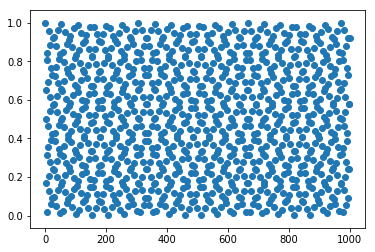

In [113]:
fig = plt.figure()
fig.add_subplot(111)
plt.scatter(list(range(0,len(bflist))),bflist)

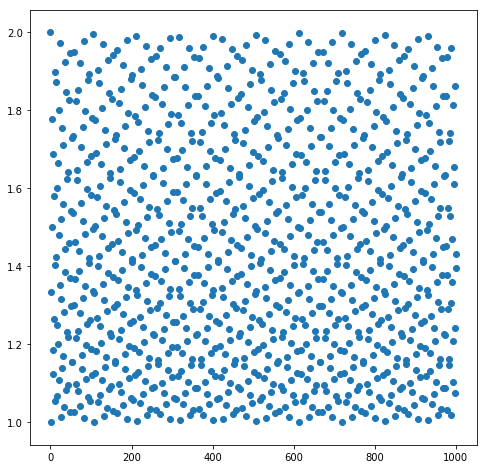

In [112]:
fig = plt.figure(figsize=(8,8))
fig.add_subplot(111)
plt.scatter(list(range(0,len(listy))),listy)

In [25]:
from fractions import Fraction

In [31]:
Fraction(.257)-Fraction(.3453)

Fraction(-1590671388387259, 18014398509481984)

In [34]:
beatfreq(1,2)

Fraction(1, 1)

In [36]:
beatfreq(ycor[2],ycor[3])

Fraction(750599937895083, 4503599627370496)

In [37]:
ycor[2]

Decimal('1.3333333333333332593184650249895639717578887939453125')

In [98]:
q = 2
p = 3
xcor = []
listy =[]
x = 0
i = 0

def pycode(x):
    n = math.floor((x*(math.log(p,math.e)/math.log(q,math.e))))#a1
    return n

while x <= 500:
    listy.append(Fraction(q**(pycode(x)+1),p**x))
    listy.append(Fraction(p**x,q**pycode(x)))
    x += 1

In [59]:
listy

[Fraction(2, 1),
 Fraction(1, 1),
 Fraction(4, 3),
 Fraction(3, 2),
 Fraction(16, 9),
 Fraction(9, 8),
 Fraction(32, 27),
 Fraction(27, 16),
 Fraction(128, 81),
 Fraction(81, 64),
 Fraction(256, 243),
 Fraction(243, 128),
 Fraction(1024, 729),
 Fraction(729, 512),
 Fraction(4096, 2187),
 Fraction(2187, 2048),
 Fraction(8192, 6561),
 Fraction(6561, 4096),
 Fraction(32768, 19683),
 Fraction(19683, 16384),
 Fraction(65536, 59049),
 Fraction(59049, 32768),
 Fraction(262144, 177147),
 Fraction(177147, 131072),
 Fraction(1048576, 531441),
 Fraction(531441, 524288),
 Fraction(2097152, 1594323),
 Fraction(1594323, 1048576),
 Fraction(8388608, 4782969),
 Fraction(4782969, 4194304),
 Fraction(16777216, 14348907),
 Fraction(14348907, 8388608),
 Fraction(67108864, 43046721),
 Fraction(43046721, 33554432),
 Fraction(134217728, 129140163),
 Fraction(129140163, 67108864),
 Fraction(536870912, 387420489),
 Fraction(387420489, 268435456),
 Fraction(2147483648, 1162261467),
 Fraction(1162261467, 1073741

In [44]:
4/3

1.3333333333333333

In [47]:
Fraction(4,3)-Fraction(6,4)

Fraction(-1, 6)

In [46]:
6/4

1.5

In [71]:
float(Fraction(1/6))

0.16666666666666666

In [49]:
1/6

0.16666666666666666

In [57]:
6004799503160661/36028797018963968

0.16666666666666666

In [63]:
47/72

0.6527777777777778

In [97]:
np.std(bflist)

0.28826563945404027

In [117]:
np.std(ycor)

0.2875584609855797

In [126]:
q = 2
p = 3
xcor = []
ycor =[]
x = 0
i = 0

def pycode(x):
    n = math.floor((x*(math.log(p,math.e)/math.log(q,math.e))))#a1
    return n

while x <= len(bflist)/2:
    ycor.append((q**(pycode(x)+1)/p**x))
    ycor.append((p**x/q**pycode(x)))
    x += 1

In [127]:
np.correlate(bflist,ycor)

array([706.13534617, 707.94249794])

In [128]:
len(bflist)

1001

In [129]:
len(ycor)

1002